<a href="https://colab.research.google.com/github/Ganesh7134/IMDB-Movies-Dashboard/blob/main/IMDB_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/IMDB_Movies.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
len(df)

5043

In [4]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
df["gross"].min() , df["gross"].max()

(162.0, 760505847.0)

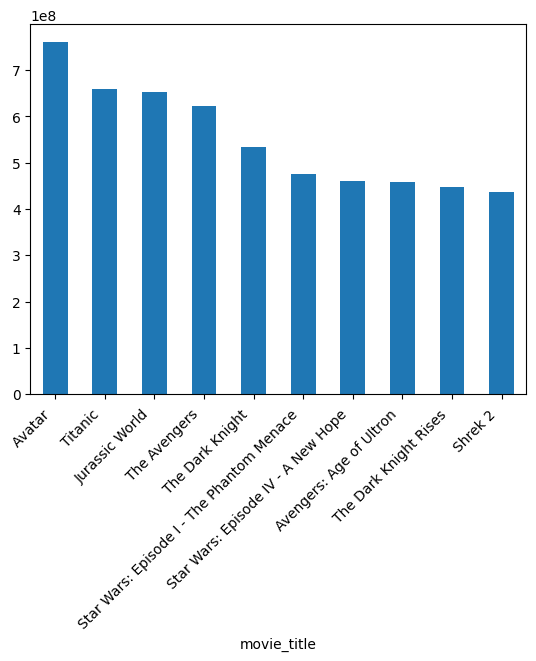

In [6]:
import matplotlib.pyplot as plt
df.groupby("movie_title")["gross"].mean().sort_values(ascending=False)[:10].plot(kind="bar")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.show()

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
Imputed = imputer.fit_transform(df["gross"].values.reshape(-1,1))

In [8]:
df["gross"] = Imputed

In [9]:
df["gross"].head()

0    7.605058e+08
1    3.094042e+08
2    2.000742e+08
3    4.481306e+08
4    4.846841e+07
Name: gross, dtype: float64

In [10]:
df["gross"].min() , df["gross"].max()

(162.0, 760505847.0)

In [11]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [12]:
df["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [13]:
df["color"].mode()[0]

'Color'

In [14]:
df["color"] = df["color"].fillna(df["color"].mode()[0])

In [15]:
df.isna().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [16]:
df["director_name"].value_counts().sort_values(ascending=False)

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
Ryan Smith           1
Travis Romero        1
Andrew Haigh         1
Cary Bell            1
Daniel Hsia          1
Name: director_name, Length: 2398, dtype: int64

In [17]:
df.isna().sum()["director_name"]

104

In [18]:
df[df["director_name"].isna()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
177,Color,NaN,21.0,60.0,NaN,184.0,Philip Michael Thomas,982.0,4.846841e+07,Action|Crime|Drama|Mystery|Thriller,...,74,English,USA,TV-14,1500000.0,NaN,321.0,7.5,1.33,0
260,Color,NaN,29.0,60.0,NaN,432.0,Dirk Benedict,669.0,4.846841e+07,Action|Adventure|Crime,...,97,English,USA,TV-PG,NaN,NaN,554.0,7.6,4.00,0
404,Color,NaN,103.0,44.0,NaN,148.0,Scott Thompson,544.0,4.846841e+07,Crime|Drama|Horror|Mystery|Thriller,...,270,English,USA,TV-14,NaN,NaN,183.0,8.6,1.78,59000
459,Color,NaN,95.0,54.0,NaN,0.0,Royce Johnson,577.0,4.846841e+07,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,...,394,English,USA,TV-MA,NaN,NaN,4.0,8.8,16.00,55000
479,Black and White,NaN,31.0,25.0,NaN,474.0,Agnes Moorehead,1000.0,4.846841e+07,Comedy|Family|Fantasy,...,71,English,USA,TV-G,NaN,NaN,960.0,7.6,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,Color,NaN,75.0,60.0,NaN,833.0,Masi Oka,1000.0,4.846841e+07,Drama|Fantasy|Sci-Fi|Thriller,...,379,English,USA,TV-14,NaN,NaN,923.0,7.7,16.00,0
4803,Color,NaN,11.0,22.0,NaN,6.0,Ron Lynch,59.0,4.846841e+07,Animation|Comedy|Drama,...,82,English,USA,TV-PG,NaN,NaN,11.0,8.2,1.33,526
4819,Color,NaN,23.0,43.0,NaN,576.0,Tracy Spiridakos,2000.0,4.846841e+07,Action|Adventure|Drama|Sci-Fi,...,323,English,USA,TV-14,NaN,NaN,821.0,6.7,16.00,17000
4869,Color,NaN,11.0,58.0,NaN,250.0,James Norton,887.0,4.846841e+07,Crime|Drama,...,59,English,UK,TV-MA,NaN,NaN,340.0,8.5,16.00,10000


In [19]:
df["director_name"].isna().sum() / df.shape[0]

0.02062264525084275

In [20]:
df["director_name"].dropna(inplace=True)

In [21]:
df.isna().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [22]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)
imputed = knn.fit_transform(df["aspect_ratio"].values.reshape(-1,1))

In [23]:
df["aspect_ratio"] = imputed

In [24]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [25]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)
imputed = knn.fit_transform(df["budget"].values.reshape(-1,1))

In [26]:
df["budget"].value_counts()

20000000.0    174
15000000.0    143
25000000.0    142
30000000.0    141
10000000.0    135
             ... 
10818775.0      1
13800000.0      1
12305523.0      1
12600000.0      1
1100.0          1
Name: budget, Length: 439, dtype: int64

In [27]:
df["budget"] = imputed

In [28]:
df.isna().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                         0
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [29]:
int(df["title_year"].median())

2005

In [30]:
df["title_year"] = df["title_year"].fillna(int(df["title_year"].mean()))

In [31]:
df.title_year.value_counts()

2002.0    317
2009.0    260
2014.0    252
2006.0    239
2013.0    237
         ... 
1932.0      1
1916.0      1
1934.0      1
1925.0      1
1920.0      1
Name: title_year, Length: 91, dtype: int64

In [32]:
df.isna().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [33]:
df["actor_2_facebook_likes"].value_counts()

1000.0     309
11000.0    111
2000.0     100
3000.0      76
0.0         55
          ... 
964.0        1
179.0        1
355.0        1
556.0        1
470.0        1
Name: actor_2_facebook_likes, Length: 917, dtype: int64

In [34]:
int(df["actor_2_facebook_likes"].mean())

1651

In [35]:
df["actor_2_facebook_likes"] = df["actor_2_facebook_likes"].fillna(int(df["actor_2_facebook_likes"].mean()))

In [36]:
df.isna().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

**Motion Picture Association of America (MPAA) ratings**:

* **R**: Restricted - Requires accompanying parent or adult guardian for viewers under 17.
* **PG-13**: Parents Strongly Cautioned - Some material may be inappropriate for children under 13.
* **PG**: Parental Guidance Suggested - Some material may not be suitable for children.
* **G**: General Audiences - All ages admitted.

**Television Parental Guidelines**:

* **TV-14**: Parents strongly cautioned - May not be suitable for children under 14.
* **TV-MA**: For Mature Audiences - Only suitable for mature audiences due to strong content.
* **TV-PG**: Parental guidance suggested - May contain some material parents may find unsuitable for younger children.
* **TV-G**: Suitable for all audiences.
* **TV-Y**: Directed to a very young audience.
* **TV-Y7**: Directed to children ages 7 and above.

**Other**:

* **Not Rated**: The content has not been submitted for or received a formal rating.
* **Unrated**: May refer to content that has been deemed unsuitable for any rating category.
* **Approved**: Could indicate approval by a specific organization or entity, but the meaning depends on the context.
* **Passed**: Similar to "Approved," the specific meaning depends on the context.
* **NC-17**: No One Under 17 Admitted - Explicit adult content that is unsuitable for audiences under 17.
* **GP**: General Patronage - Intended for all ages, similar to G.
* **M**: Mature - May contain adult content not suitable for young children, similar to PG-13.

**Key Points**:

* The majority of your data seems to have **MPAA** and **TV** Parental Guidelines ratings.
* The presence of "PG" and "TV-G" ratings suggests you might be dealing with family-oriented content.
* The occurrence of "R" and "TV-14" indicates some content might be mature or unsuitable for younger audiences.

In [37]:
df["content_rating"].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [38]:
df.groupby("content_rating")["imdb_score"].mean().sort_values(ascending=False)

content_rating
TV-MA        8.250000
TV-Y         7.400000
TV-PG        7.353846
Approved     7.325455
TV-14        7.250000
TV-Y7        7.200000
Passed       7.166667
Unrated      6.920968
TV-G         6.920000
GP           6.916667
M            6.840000
Not Rated    6.631034
NC-17        6.542857
G            6.529464
R            6.527101
X            6.500000
PG           6.294437
PG-13        6.257495
Name: imdb_score, dtype: float64

In [39]:
df["content_rating"] = df["content_rating"].fillna("TV-MA")

In [40]:
df.isna().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [41]:
df.dropna(subset=["director_name"], inplace=True)

In [42]:
df.isna().sum()

color                          0
director_name                  0
num_critic_for_reviews        45
duration                      13
director_facebook_likes        0
actor_3_facebook_likes        20
actor_2_name                  11
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  20
facenumber_in_poster          13
plot_keywords                144
movie_imdb_link                0
num_user_for_reviews          18
language                      11
country                        3
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [43]:
df["plot_keywords"].isna().sum()/len(df)

0.029155699534318687

In [44]:
df.dropna(subset=["plot_keywords"],inplace=True)

In [45]:
len(df)

4795

In [46]:
df.isna().sum()

color                         0
director_name                 0
num_critic_for_reviews       23
duration                      6
director_facebook_likes       0
actor_3_facebook_likes       14
actor_2_name                  8
actor_1_facebook_likes        7
gross                         0
genres                        0
actor_1_name                  7
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 14
facenumber_in_poster         11
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          6
language                      7
country                       1
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

In [47]:
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [48]:
df.country.value_counts()

USA                     3648
UK                       426
France                   150
Canada                   109
Germany                   97
Australia                 53
Spain                     32
India                     29
China                     26
Japan                     22
Italy                     20
Hong Kong                 16
New Zealand               15
South Korea               12
Mexico                    11
Russia                    11
Denmark                   11
Ireland                   11
Brazil                     8
South Africa               8
Norway                     7
Thailand                   5
Sweden                     5
Netherlands                5
Argentina                  4
Iran                       4
Switzerland                3
West Germany               3
Belgium                    3
Israel                     3
Czech Republic             3
Taiwan                     2
Poland                     2
Romania                    2
Iceland       

In [49]:
df.isna().sum()

color                         0
director_name                 0
num_critic_for_reviews       23
duration                      6
director_facebook_likes       0
actor_3_facebook_likes       14
actor_2_name                  8
actor_1_facebook_likes        7
gross                         0
genres                        0
actor_1_name                  7
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 14
facenumber_in_poster         11
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          6
language                      7
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

In [50]:
df["language"].value_counts()

English       4492
French          69
Spanish         35
Hindi           26
Mandarin        26
German          18
Japanese        17
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Norwegian        4
Hebrew           4
Arabic           4
Persian          4
Swedish          4
Dutch            4
Thai             3
Dari             2
Aboriginal       2
None             2
Indonesian       2
Zulu             2
Czech            1
Romanian         1
Urdu             1
Vietnamese       1
Dzongkha         1
Polish           1
Maya             1
Filipino         1
Mongolian        1
Kazakh           1
Icelandic        1
Telugu           1
Hungarian        1
Bosnian          1
Aramaic          1
Greek            1
Name: language, dtype: int64

In [51]:
df["language"] = df["language"].fillna(df["language"].mode()[0])

In [52]:
df.isna().sum()

color                         0
director_name                 0
num_critic_for_reviews       23
duration                      6
director_facebook_likes       0
actor_3_facebook_likes       14
actor_2_name                  8
actor_1_facebook_likes        7
gross                         0
genres                        0
actor_1_name                  7
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 14
facenumber_in_poster         11
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          6
language                      0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

In [53]:
df["num_critic_for_reviews"].value_counts()

81.0     33
43.0     30
63.0     29
25.0     29
46.0     28
         ..
765.0     1
738.0     1
476.0     1
775.0     1
409.0     1
Name: num_critic_for_reviews, Length: 528, dtype: int64

In [54]:
df["num_critic_for_reviews"].min() , df["num_critic_for_reviews"].max()

(1.0, 813.0)

In [55]:
int(df["num_critic_for_reviews"].mean())

145

In [56]:
df["num_critic_for_reviews"] = df["num_critic_for_reviews"].fillna(int(df["num_critic_for_reviews"].mean()))

In [57]:
df.num_critic_for_reviews.value_counts().sort_values(ascending=False)

145.0    39
81.0     33
43.0     30
25.0     29
63.0     29
         ..
426.0     1
588.0     1
399.0     1
543.0     1
409.0     1
Name: num_critic_for_reviews, Length: 528, dtype: int64

In [58]:
from scipy.stats import skew
print(skew(df["num_critic_for_reviews"]))

1.510134765848394


In [59]:
df.isna().sum()

color                         0
director_name                 0
num_critic_for_reviews        0
duration                      6
director_facebook_likes       0
actor_3_facebook_likes       14
actor_2_name                  8
actor_1_facebook_likes        7
gross                         0
genres                        0
actor_1_name                  7
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 14
facenumber_in_poster         11
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          6
language                      0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

In [60]:
int(df["actor_3_facebook_likes"].mean())

664

In [61]:
df["actor_3_facebook_likes"] = df["actor_3_facebook_likes"].fillna(int(df["actor_3_facebook_likes"].mean()))

In [62]:
df["actor_3_facebook_likes"].value_counts()

1000.0     124
0.0         69
11000.0     29
2000.0      27
3000.0      26
          ... 
779.0        1
527.0        1
916.0        1
487.0        1
156.0        1
Name: actor_3_facebook_likes, Length: 905, dtype: int64

In [63]:
df.isna().sum()

color                         0
director_name                 0
num_critic_for_reviews        0
duration                      6
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  8
actor_1_facebook_likes        7
gross                         0
genres                        0
actor_1_name                  7
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 14
facenumber_in_poster         11
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          6
language                      0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

In [64]:
len(df)

4795

In [65]:
df.dropna(inplace=True)

In [66]:
len(df)

4760

In [67]:
df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [68]:
4760/5043

0.9438826095578029

In [69]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [70]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [71]:
df.to_csv("IMDB_preprocessed_data.csv",index=False)

In [78]:
df.groupby("budget")["gross"].sum().sort_values(ascending=False)

budget
3.975262e+07    7.985616e+09
1.500000e+08    7.477336e+09
4.000000e+07    6.491284e+09
3.000000e+07    6.250419e+09
2.000000e+08    5.816435e+09
                    ...     
1.140000e+07    1.375100e+04
1.400000e+04    1.266700e+04
6.953930e+05    6.013000e+03
8.400000e+06    5.725000e+03
9.000000e+03    4.584000e+03
Name: gross, Length: 430, dtype: float64